In [6]:
!pip install scikit-image
!pip install numpy-stl

  Using cached numpy_stl-3.0.1-py3-none-any.whl (19 kB)


In [7]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from stl import mesh

In [24]:
!pip uninstall -y stl # module 'stl' has no attribute 'BaseStl' resolved

Found existing installation: stl 0.0.3
Uninstalling stl-0.0.3:
  Successfully uninstalled stl-0.0.3


In [19]:
# !pip install stl
!pip install numpy-stl

In [25]:
# dir(stl)
# help(stl)
# !pip show stl
!pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
altgraph                      0.17.3
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
be

In [2]:
# help(numpy.meshgrid)
x = y = np.linspace(-1,1,100)
z = np.linspace(0,0.5,100)
x2d,y2d = np.meshgrid(x,y,indexing='xy')
x3d,y3d,z3d = np.meshgrid(x,y,z,indexing='xy')
m = x3d**2 + y3d**2 >= z3d

In [14]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'Bytes0',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'Datetime64',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Str0',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'Uint64',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',


In [47]:
mask = (x3d**2 + y3d**2 >= z3d) * (x3d**2 + y3d**2 <= 1.5*z3d)
mask[:,:,-1] = 0
mask[:,:,-2] = 0
mask[:,:,0] = 0

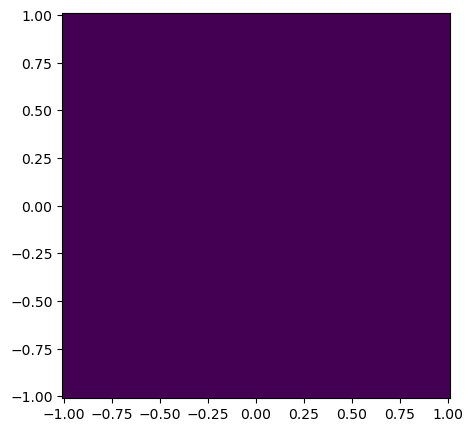

In [48]:
plt.figure(figsize=(5,5))
plt.pcolormesh(x2d,y2d, mask[:,:,-1])

In [49]:
verts, faces, normals, values = measure.marching_cubes(mask,0)

In [50]:
indexing = 0
dx = np.diff(x)[indexing]
dy = np.diff(y)[indexing]
dz = np.diff(z)[indexing]
dr = np.array([dx,dy,dz])
dr # note that all the dx,dy,dz are the same regardless of index! Because linspace is used. 

array([0.02020202, 0.02020202, 0.00505051])

In [51]:
print(verts[0])
print(verts[49])
print(verts[50])
# verts = verts * dr
print(verts[0])
print(verts[49])
print(verts[50])

[ 7. 41. 97.]
[ 7. 49. 95.]
[ 7. 49. 96.]
[ 7. 41. 97.]
[ 7. 49. 95.]
[ 7. 49. 96.]


In [52]:
print(1/dx)
print(1/dy)
print(1/dz)

49.49999999999995
49.49999999999995
197.99999999999997


In [53]:
obj_3d = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
obj_3d.vectors.shape

(102840, 3, 3)

In [54]:
faces[:5] # contains the indexes of the actual vector in the verts array

array([[2, 1, 0],
       [0, 3, 2],
       [6, 5, 4],
       [6, 4, 1],
       [4, 0, 1]], dtype=int32)

In [55]:
for i,f in enumerate(faces):
    obj_3d.vectors[i] = verts[f]
obj_3d.save('RandomSTL.stl')

In [26]:
board = [[".",".",".",".","5",".",".","1","."],[".","4",".","3",".",".",".",".","."],[".",".",".",".",".","3",".",".","1"],["8",".",".",".",".",".",".","2","."],[".",".","2",".","7",".",".",".","."],[".","1","5",".",".",".",".",".","."],[".",".",".",".",".","2",".",".","."],[".","2",".","9",".",".",".",".","."],[".",".","4",".",".",".",".",".","."]]

for i in board:
    print(i)

def isValidSudoku(board) -> bool:
    valid_string_array = [str(i) for i in range(1,10)]
    for _row_col in range(9):
        # check for rows. 
        distinct_row_values = set(board[_row_col])
        for var in distinct_row_values:
            if var not in valid_string_array:
                continue
            if board[_row_col].count(var) > 1:
                print(f"row: {_row_col}")
                return False
        col_values = [board[i][_row_col] for i in range(9)]
        distinct_col_values = set(col_values)
        for var in distinct_col_values:
            if var not in valid_string_array:
                continue
            if col_values.count(var) > 1:
                print(f"col: {_row_col}")
                return False
    for grid_row in range(3):
        for grid_col in range(3):
            small_grid_values = []
            row_start = grid_row*3
            row_end = row_start + 3
            col_start = grid_col*3
            col_end = col_start + 3
            for r in range(row_start, row_end):
                for c in range(col_start, col_end):
                    small_grid_values.append(board[r][c])
            print(f"small grid {grid_row*3 + grid_col}: {small_grid_values}")
            for var in set(small_grid_values):
                if var not in valid_string_array:
                    continue
#                 if grid_row*3 + grid_col == "2":
#                     print(f"board[_row_col].count(var) : {}")
#                     pass
                if small_grid_values.count(var) > 1:
                    print(f"col: {_row_col}")
                    return False

    return True
isValidSudoku(board)

['.', '.', '.', '.', '5', '.', '.', '1', '.']
['.', '4', '.', '3', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '3', '.', '.', '1']
['8', '.', '.', '.', '.', '.', '.', '2', '.']
['.', '.', '2', '.', '7', '.', '.', '.', '.']
['.', '1', '5', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '2', '.', '.', '.']
['.', '2', '.', '9', '.', '.', '.', '.', '.']
['.', '.', '4', '.', '.', '.', '.', '.', '.']
small grid 0: ['.', '.', '.', '.', '4', '.', '.', '.', '.']
small grid 1: ['.', '5', '.', '3', '.', '.', '.', '.', '3']
col: 8


False

In [36]:
class Solution:
    def max_depth(self, root):
        f = Solution.func_call(1)
        return 1
    
    def func_call(rand):
        return rand
var = Solution().max_depth(2)
var

1

In [41]:
[1,2,3].pop()

3

In [44]:
7//4

1

In [45]:
"a" in "aasfaf"

True

In [48]:
25%24

1

In [ ]:
    def maxSubArray(self, nums: List[int]) -> int:
        highest = max(nums)
        indices = []
        for idx in range(len(nums)):
            if nums[idx] == highest:
                indices.append(idx)
        highest_sum = nums[indices[0]]
        for index in indices:
            nums_sum = nums[index]
            l = max(0, index)
            r = min(len(nums), index + 1)
            l_highest = l
            while l > 0:
                l -= 1
                if highest_sum < sum(nums[l:r]):
                    highest_sum = sum(nums[l:r])
                    l_highest = l
            while r < len(nums) + 1:
                # print(f"l: {l}, r: {r}, ")
                # print(f"l: {l}, r: {r}, sum : {sum([nums[l:r]])}")
                r += 1
                if highest_sum < sum(nums[l_highest:r]):
                    highest_sum = sum(nums[l_highest:r])
                    print(f"L,R: {l_highest}, {r} == {highest_sum}")
        return highest_sum

In [53]:
c = []
c + ['s']

['s']

In [66]:
def permute(nums):
    n = len(nums)
    if n == 0:
        return []
    if n == 1:
        return [nums]
    res = []
    for i in range(n):
        m = nums[i]
        rem_list = nums[:i] + nums[i+1:]
        for p in permute(rem_list):
            res.append([m] + p)
    return res
def permute_k(nums, k):
    n = len(nums)
    if n == 0 or k <= 0:
        return [[]]
    res = []
    for i in range(n):
        m = nums[i]
        rem_list = nums[:i] + nums[i+1:]
        for p in permute_k(rem_list, k-1):
            res.append([m] + p)
    return res
nums = [1,2,3]
print(permute(nums))
print(permute_k(nums, 2))
        

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]
[[1, 2], [1, 3], [2, 1], [2, 3], [3, 1], [3, 2]]


In [67]:
n = [1,2,3,4]
n.index(5)

ValueError: 5 is not in list

In [79]:
# Return single digit sum of a number
def digSum(n):
    if n == 0:
        return 0
    return (n % 9 == 0) and 9 or (n % 9)
     
# Returns recursive sum of digits of a number
# formed by repeating a number X number of
# times until sum become single digit.
def repeatedNumberSum(n, x):
    sum = x * digSum(n)
    return digSum(sum)
 
# Driver Code
n = 24; x = 3
print(repeatedNumberSum(n, x))

digSum(9)
repeatedNumberSum(4, 3)

9


3

In [80]:
# Password:  Marc004@